**PRÁCTICA 1. FORDWARD & BACKPROPAGATION: EVALUANDO EL PERCEPTRON CON FUNCIONES LÓGICAS**

En esta primera práctica el alumno desarrollará los algoritmos fundamentales del aprendizaje profundo: **fordward** y **backpropagation**. La implementación de ambos algoritmos hará que el estudiante entienda y afiance la información proporcionada en la sesión teórica. Además, gracias a estos ejercicios se entenderán concecptos como la **inicialización de los pesos**, el significado de **época**, cálculo del **error**, **actualización de los pesos**, **bias**, **función de activación** y **datasets lógicos**.

Rossenblatt definió el Perceptrón como un sistema de aprendizaje supervisado, es decir, un sistema que aprende a partir de datos etiquetados mapeando estas entradas a las diferentes categorias de salida. En su forma más simple el Perceptrón contiene **N** nodos de entrada (uno por cada una de las entradas de nuestra matriz de datos) seguido por una **ÚNICA capa de UN solo nodo** tal y como se puede ver en la siguiente figura:

![Perceptron simple](https://drive.google.com/uc?id=1ioUlrmt1AJOwuYZ3gzUfR5ONhtJyThK2)


Esta simple red conecta nuestro vector de entrada ($x_j$) con el nodo de salida por medio de ciertas conexiones caracterizadas por unos pesos en un instante dado ($w(t)$) junto con el  término bias ($b$) . La predicción de salida por lo tanto se puede obtener como $p_j=w(t)x_j$. El objetivo de la fase de entrenamiento de una red neuronal es optimizar los valores de los pesos $w$ con el objetivo de minimizar el error a la salida entre la predicción ($p_j$) y el *ground truth* ($d_j$). Para ello, cuando una muestra de entrenamiento pase por nuestra red, se obtendrá el error como $e = d_j - p_j$ y se actualizarán los pesos según la ecuación $w_i(t+1) = w_i(t) - \eta(d_j-p_j)x_{j,i}$ para todas las características $0 \leq i \leq n$. 

**EJERCICIO 1.** En primer lugar  **vamos a programar** en lenguaje **Python** (haciendo uso  de nuevo **exclusivamente** del paquete científico **numpy**) una clase denominada **```Perceptron```** que contenga los métodos necesarios para las fases de entrenamiento y predicción. Concretamente, dicha clase contendra los siguientes métodos:

- Método **```__init__```**: Este método será el **constructor de la clase**. A través del mismo instanciaremos un objeto de la clase ```Perceptron```. Dicho método recibirá como parámetros de entrada el número de entradas al perceptrón (**```N```**) y la tasa de aprendizaje (**```eta```**). Si no se proporciona valor de tasa de aprendizaje, por defecto **```eta=0.1```**. Este método debe **inicializar aleatoriamente los pesos** **```W```** siguiendo una **distribución** normal (**Gaussiana**) de media cero y varianza unidad.

- Método **```thresholding```**: Este método aplicará un **umbral a las predicciones** para convertirlas en un valor binario. Si $p_j(x)>0$ entonces $\hat{y} = 1$, en cualquier otro caso $\hat{y}=0$.

- Método **```fit```**: Esta función será la encargada de **"ajustar" los datos al modelo**, es decir, se encargará de la **fase de entrenamiento**. Para ello, se recorre un número de épocas dado y para cada época (por defecto **```epochs = 15```**) se calcula el producto de la **entrada por los pesos** (para todas las conexiones de la figura anterior) y se aplica la **función umbral**. Posteriormente se calcula el **error** y se **actualizan los pesos**.

- Método **``predict``**: Se encargará de realizar la **predicción de nuevas muestras**. El método devolverá la multiplicación de la entrada por los pesos (obtenidos en la fase de entrenamiento) habiendo aplicado a dicha operación la función umbral. 

In [0]:
import numpy as np

class Perceptron:
  
  def __init__(self, N, eta=0.1):
    # Inicializar la matriz de pesos y almacenar la tasa de aprendizaje
    self.W = np.random.randn(N + 1) / np.sqrt(N)
    self.eta = eta
    
  def thresholding(self, x):
    # Aplicar a función umbral
    return 1 if x >0 else 0
  
  def fit(self, X, y, epochs=15):
    # Añadir bias en la última columna de la matriz
    X = np.c_[X, np.ones((X.shape[0]))]
    # Recorremos el número de épocas pre-establecido
    for epoch in np.arange(0, epochs):
      # Para cada uno de los puntos del dataset
      for (x, target) in zip(X, y): 
        # Producto de la entrada por los pesos de cada una de las conexiones
        # (producto matricial, i.e. dot en numpy) y aplicar la función umbral
        p = self.thresholding(np.dot(x,self.W))
        # Actualizar pesos en caso de que la predicción y el ground truth sean distintos
        if p != target:
          # Calculo del error
          e = p - target
          # Actualización de pesos
          self.W = self.W - self.eta*(e)*x
          
  def predict(self, X, addBias=True):
    # Aseguramos que la entrada es una matriz
    X = np.atleast_2d(X)
    # Añadimos el bias a las muestras de test si es necesario
    if addBias:
      X = np.c_[X, np.ones((X.shape[0]))]
    # Devolevmos la etiqueta con la prediccón
    return self.thresholding(np.dot(X,self.W))

**EJERCICIO 2.** Despues de programar la clase ```Perceptron``` vamos a  **entrenarlo**. Para ello, en primer lugar debemos **construir el set de datos OR**. Crea un primer numpy array **```X```** que contenga una **lista** en la que cada entrada sea una **pareja de bits [$x_1$, $x_2$]** (ver transparencia proyectada) y un segundo numpy array **```y```** que contenga una lista con la **salida del operador lógico** en cuestión para cada pareja de entradas. Posteriormente, se debe instanciar un objeto de la clase ``Perceptron`` con el valor de **```alpha```** por defecto y efectuar el proceso de entrenamiento durante **```epochs=20```**. Por último podemos **evaluar nuestro perceptrón** en cada pareja de puntos del numpy array de datos de entrada **```X```** para comprobar si es capaz de modelar el comportamiento del dataset lógico OR. Comente brevemente los resultados obtenidos.

In [22]:
import numpy as np
# Construimos el dataset OR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])

# Definimos nuestro perceptrón y lo entrenamos
print("[INFO]: Training perceptron with the OR dataset...")
my_perceptron = Perceptron(X.shape[-1])
my_perceptron.fit(X,y)

# Evaluemos nuestro preceptrón
print("[INFO]: Testing perceptron with the OR dataset...")
for (x, target) in zip(X, y):
  pred = my_perceptron.predict(x)
  print("[INFO]: data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO]: Training perceptron with the OR dataset...
[INFO]: Testing perceptron with the OR dataset...
[INFO]: data=[0 0], ground-truth=0, pred=0
[INFO]: data=[0 1], ground-truth=1, pred=1
[INFO]: data=[1 0], ground-truth=1, pred=1
[INFO]: data=[1 1], ground-truth=1, pred=1


A continuación **replica el ejercicio** anterior para las **funciones lógicas AND y XOR** en dos celdas distintas. Comente de nuevo los resultados obtenidos. ¿A que crees que se debe lo que ocurre con el set de datos XOR? 

In [23]:
import numpy as np
# Construimos el dataset AND
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])

# Definimos nuestro perceptrón y lo entrenamos
print("[INFO]: Training perceptron with the AND dataset...")
my_perceptron = Perceptron(X.shape[-1])
my_perceptron.fit(X,y)

# Evaluemos nuestro preceptrón
print("[INFO]: Testing perceptron with the AND dataset...")
for (x, target) in zip(X, y):
  pred = my_perceptron.predict(x)
  print("[INFO]: data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO]: Training perceptron with the AND dataset...
[INFO]: Testing perceptron with the AND dataset...
[INFO]: data=[0 0], ground-truth=0, pred=0
[INFO]: data=[0 1], ground-truth=0, pred=0
[INFO]: data=[1 0], ground-truth=0, pred=0
[INFO]: data=[1 1], ground-truth=1, pred=1


In [26]:
import numpy as np
# Construimos el dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Definimos nuestro perceptrón y lo entrenamos
print("[INFO]: Training perceptron with the XOR dataset...")
my_perceptron = Perceptron(X.shape[-1])
my_perceptron.fit(X,y)

# Evaluemos nuestro preceptrón
print("[INFO]: Testing perceptron with the XOR dataset...")
for (x, target) in zip(X, y):
  pred = my_perceptron.predict(x)
  print("[INFO]: data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO]: Training perceptron with the XOR dataset...
[INFO]: Testing perceptron with the XOR dataset...
[INFO]: data=[0 0], ground-truth=0, pred=1
[INFO]: data=[0 1], ground-truth=1, pred=0
[INFO]: data=[1 0], ground-truth=1, pred=0
[INFO]: data=[1 1], ground-truth=0, pred=0


No importa cuantas veces se lleve a cabo el proceso de entrenamiento variando la tasa de aprendizaje o inicializando de distintas formas los pesos de las capas, **el Perceptrón de una única capa NUNCA sera capaz de aprender las no linealidades** del conjunto de datos XOR. Es por ello que en el siguiente ejercicio vamos a implementar lo que podriamos considerar nuestra primera red neuronal del curso, el **perceptrón multicapa**. 



---



El perceptron multicapa (***multilayer perceptron*** en inglés) esta compuesto por al menos una capa oculta o ***hidden layer***. Tal y como hemos visto en el apartado teórico, esta capa oculta está **compuesta por una serie de neuronas** cuya función es **aplicar una no linealidad al producto de los pesos por las entradas a dicha capa** (ya sean las entradas a la red o las salidas de una capa oculta anterior). 

![Perceptron_multicapa](https://drive.google.com/uc?id=1gG4098wxVLS54RW89VW2cyAV7ysOcoWd)





Es en este tipo de redes en el que al menos existe una capa oculta, cuando entra en juego el algoritmo de propagación hacia detrás o ***backpropagation***. Dicho algoritmo es sin duda el  más importante en la historia de las redes neuronales. Sería impensable entrenar redes neuronales de una profundidad como la actual sin esta técnica.

El algoritmo de backpropagation se divide en **dos fases**:

1.   El paso hacia adelante o ***forward propagation*** donde nuestras entradas atraviesan la red neuronal y obtenemos a la salida una predicción para las mismas. En la arquitectura de la figura anterior, las predicciones se obtienen como $p(x) = f(a\cdot W^1+b_1)$, siendo $a=f(x \cdot W^0+b_0)$.
2.   El paso hacia detrás o ***backward propagation*** donde se calcula el gradiente de la función de pérdidas a la salida de la última capa de la red. Dicho gradiente se utiliza posteriormente para actualizar los pesos de nuestra red de manera recursiva.

Para aplicar el algoritmo de retropropagación, es necesario que la función de activación empleada sea diferenciable para poder calcular las derivadas parciales del error con respecto a un peso dado $w_{i,j}$ siguiendo la regla de la cadena:

$\dfrac{\partial E}{dw_i^j} = \dfrac{\partial E}{\partial a_j}\dfrac{\partial a_j}{\partial z_j}\dfrac{\partial z_j}{\partial w_i^j}$, donde $E$ hace referencia al error o pérdidas a la salida de la red, $a_j$ es la salida de la neurona $j$ (tras la función de activación), y $z_j$ es la salida de la neurona $j$ antes de aplicar la función de activación (i.e. producto entradas (activaciones) por pesos).

**EJERCICIO 3.** En este ejercicio **vamos a desarrollar** en lenguaje **Python** (haciendo uso  de nuevo **exclusivamente** del paquete científico **numpy**) los algoritmos de forward y backpropagation. Para ello vamos a desarrollar **una clase denominada ```NeuralNetwork```** que contendrá un serie de métodos que analizamos a continuación:

- Método **```__init__```**: Este método será el **constructor de la clase**. A través del mismo instanciaremos un objeto de la clase ```NeuralNetwork```. Dicho método recibirá como parámetros de entrada una lista (variable **```layers```**)  con el número de neuronas por capa que conformarán la arquitectura de red y la tasa de aprendizaje (**```eta```**). Si no se proporciona valor de tasa de aprendizaje, por defecto **```eta=0.1```**. Este método debe **inicializar aleatoriamente los pesos** **```W```** que conectan **cada una** de las capas de la red siguiendo una **distribución** normal (**Gaussiana**) de media cero y varianza unidad.
​
- Método **```__repr__```**: Este método muestra por pantalla la arquitectura de red implementada.

- Método **```sigmoid```**: Contendrá la ecuación de la función de activación sigmoide.

- Método **```sigmoid_deriv```**: Contendrá la derivada de la función de activación. La emplearemos en el cálculo del error hacia detrás en el algortimo de *backpropagation*. 

- Método **```fit```**: Esta función será la encargada de **"ajustar" los datos al modelo**, es decir, se encargará de la **fase de entrenamiento**. Para ello, se recorre un número de épocas dado y para cada época (por defecto **```epochs = 1000```**) se llama a la función **```fit_partial```** para cada uno de los pares de datos de entrada. Posteriormente, se calcula el error (pérdidas) y se almacenan para poder graficarlas posteriormente.

- Método **```fit_partial```**: Es el encargado del proceso de entrenamiento como tal. Dicho método se puede dividir en tres fases:

>1.   Propagación hacia delante (**Fordward propagation**): Producto de la **entrada por los pesos** y **función de activación para cada una de las capas** de la arquitectura (almacenar en una lista). 
2.   Propagación del error hacia detrás (**Backpropagation**): Cálculo del **error a la salida**, y obtención del error **en cada capa** aplicando la **"regla de la cadena"**. Recuerda que debes recorrer las capas de atrás hacia delante e ir calculando la delta (error) asociada a la capa en cuestión como:

>>>>>>>>$d^{l-1} = (d^l*(W^{l-1})^T)\cdot f'(a^{l-1})$ 

>3. Actualización de los pesos (**Weights update**): Actualizar los pesos **de cada capa** según la ecuación para actualizar los pesos vista en la clase teórica y en la introducción a la práctica.

- Método **``calculate_loss``**: Cálculo del error cuadrático medio a partir de las etiquetas y las predicciones. 

- Método **``predict``**: Se encargará de realizar la **predicción de nuevas muestras**. El método devolverá la salida de la red. Pada cada capa realizará la multiplicación de la entrada por los pesos obtenidos en la fase de entrenamiento y aplicará la función de activación. 



In [0]:
# Importamos la única librería con la que desarrollaremos nuestra primera NN
import numpy as np
# Una librería más solo para propósitos de visualización
import matplotlib.pyplot as plt

class NeuralNetwork:
  def __init__(self, layers, eta=0.1):
    # Inicialicemos una lista de pesos y almacenemos la arquitectura de red y lr
    self.W = []
    self.layers = layers # Lista de enteros, ejem [2,2,1] significa que tenemos dos entradas, una capa oculta de dos nodos y una neurona de salida. 
    self.eta = eta # Tasa de aprendizaje
    # Inicializando pesos de las capas
    for i in np.arange(0, len(layers) - 2): 
      w = np.random.randn(layers[i] + 1, layers[i+1] + 1) # Matriz M x N (salida capa i/entrada capa i+1) de pesos siguiendo distr. gaussiana (+1 por el bias) #(X)
      self.W.append(w / np.sqrt(layers[i])) # Almacenamos pesos escalados
    w = np.random.randn(layers[-2] + 1, layers[-1]) # Inicialización última capa #(X)
    self.W.append(w / np.sqrt(layers[-2]))
  
  def __repr__(self):
    # Devuelve un string con la arquitectura de la red
    return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))
  
  def sigmoid(self, x):
    return 1.0 / (1 + np.exp(-x)) #(X)
  
  def sigmoid_deriv(self, x):
    # La derivada de la función sigmoide f(x) es f'(x) = f(x) * (1 - f(x))
    # Supondremos que aquí ya entra f(x), es decir, que nos entra la salida de la sigmoide
    return x * (1 - x) #(X)
  
  def fit(self, X, y, epochs=1000, displayUpdate=100):
    # Bias trick: Concatenamos los bias para que sean parámetros entrenables de la red
    X = np.c_[X, np.ones((X.shape[0]))]
    # Lista para almacenar pérdidas para hacer un plot Loss vs epochs
    my_losses = []
    # Recorremos épocas
    for ep in np.arange(0, epochs):
      # Recorremos datos de entrada y entrenamos red
      for (x, target) in zip(X, y):
        self.fit_partial(x, target)
      # Calculamos pérdidas de todos los datos de entrenamiento
      loss = self.calculate_loss(X,y)
      my_losses.append(loss)
      # Muestro una de cada displayUpdate muestras
      if ep == 0 or (ep + 1) % displayUpdate == 0:  
        print("[INFO]: epoch={}, loss={:.7f}".format(ep + 1, loss))
    # Visualización de la curva Loss vs Epochs
    plt.plot(np.arange(0, epochs), my_losses, 'r')
    plt.ylabel('Loss')
    plt.xlabel('Epoch #')
    plt.title('Pérdidas en la fase de entrenamiento en XOR')
    plt.show()
        
  def fit_partial(self, x, y):
    # Lista de activaciones para cada capa conforme el dato pasa por la red
    # La primera activación es un caso especial, el vector de características en si mismo
    A = [np.atleast_2d(x)]
    
    # 1. PROPAGACIÓN HACIA DELANTE (FEEDFORWARD)
    for layer in np.arange(0, len(self.W)):
      net = A[layer].dot(self.W[layer]) # Multiplicación de activación por pesos actual (X)
      out = self.sigmoid(net) # Función de activación (X)
      A.append(out) # Añadimos la activación en cuestión a nuestra lista de activaciones (X)
      
    # 2. RETROPROPAGACIÓN (BACKPROPAGATION)
    error = A[-1] - y # Cáculo del error total(X)
    D = [error * self.sigmoid_deriv(A[-1])] #dE/do
    # Recorremos las capas para ir calculando las derivadas parciales
    # La última capa ya la hemos tenido en cuenta en el cáculo de la primera delta
    for layer in np.arange(len(A) - 2, 0, -1):
      # La nueva delta es la anterior multiplicada matricialmente por los pesos de la capa actual (traspuestos)
      # seguido del producto entre la delta y la derivada de la función de activación
      delta = D[-1].dot(self.W[layer].T) # (X)
      delta = delta * self.sigmoid_deriv(A[layer]) # (X)
      D.append(delta)
    # Invertimos la matriz D para tener ordenadas nuestras deltas según la red
    D = D[::-1]
    
    # 3. FASE DE ACTUALIZACIÓN DE PESOS (Aquí es dónde el aprendizaje se lleva a cabo)
    # Los nuevos pesos serán los antiguos pesos menos (dirección gradiente) el producto
    # de las activaciones de la capa en cuestión por el producto matricial de las deltas de dicha capa
    for layer in np.arange(0, len(self.W)):
      self.W[layer] += -self.eta*(A[layer].T.dot(D[layer])) # (X)
     
  def predict(self, X, addBias=True):
    # Inicializamos la salida de la predicción con los valores de entrada
    p = np.atleast_2d(X)
    # Comprobar si hay que añadir el termino del bias
    if addBias:
      p = np.c_[p, np.ones((p.shape[0]))]
    # Vamos recorriendo todas las capas y computamos la activación en cuestión
    for layers in np.arange(0, len(self.W)):
      p = self.sigmoid(np.dot(p, self.W[layers])) # (X)
    return p
  
  def calculate_loss(self, X, targets):
    # Predecimos las entradas y calculamos pérdidas
    targets = np.atleast_2d(targets)
    predictions = self.predict(X, addBias=False)
    loss = 0.5 * np.sum((predictions-targets)**2) # (X)
    return loss      

**EJERCICIO 4.** Despues de programar la clase ```NeuralNetwork``` vamos a  **entrenar** nuestra primera red neuronal. Para ello, en primer lugar debemos **construir el set de datos XOR** de la misma forma que en el EJERCICIO 2. Posteriormente, se debe instanciar un objeto de la clase ``NeuralNetwork`` con el valor de **```eta = 0.5```** y efectuar el proceso de entrenamiento durante **```epochs=5000```**. 
Por último podemos **evaluar nuestro perceptrón** en cada pareja de puntos del numpy array de datos de entrada **```X```** para comprobar si es capaz de modelar el comportamiento del dataset lógico XOR. Comente brevemente los resultados obtenidos. 

- Lleva a cabo diversas realizaciones del proceso entrenamiento-aprendizaje. ¿Se observan los mismos resultados de una ejecución a otra?¿ A que crees que es debido? 

- ¿Cual es el menor número de épocas en el cual sigue convergiendo la red a la solución óptima? 

- ¿Que sucede si dejamos fijo el número de épocas a  **```epochs=5000```** y empleamos el valor de **```eta```** por defecto?¿Por que sucede esto? 

- Experimente con distintas arquitecturas de red, ¿Que ocurre si entrena una red [2,1]?¿Por qué sucede esto? 

[INFO]: epoch=1, loss=0.5075559
[INFO]: epoch=100, loss=0.5034649
[INFO]: epoch=200, loss=0.5024807
[INFO]: epoch=300, loss=0.5019043
[INFO]: epoch=400, loss=0.5014924
[INFO]: epoch=500, loss=0.5011839
[INFO]: epoch=600, loss=0.5009456
[INFO]: epoch=700, loss=0.5007561
[INFO]: epoch=800, loss=0.5006009
[INFO]: epoch=900, loss=0.5004701
[INFO]: epoch=1000, loss=0.5003568
[INFO]: epoch=1100, loss=0.5002559
[INFO]: epoch=1200, loss=0.5001636
[INFO]: epoch=1300, loss=0.5000771
[INFO]: epoch=1400, loss=0.4999938
[INFO]: epoch=1500, loss=0.4999119
[INFO]: epoch=1600, loss=0.4998296
[INFO]: epoch=1700, loss=0.4997452
[INFO]: epoch=1800, loss=0.4996568
[INFO]: epoch=1900, loss=0.4995629
[INFO]: epoch=2000, loss=0.4994613
[INFO]: epoch=2100, loss=0.4993498
[INFO]: epoch=2200, loss=0.4992257
[INFO]: epoch=2300, loss=0.4990861
[INFO]: epoch=2400, loss=0.4989270
[INFO]: epoch=2500, loss=0.4987439
[INFO]: epoch=2600, loss=0.4985310
[INFO]: epoch=2700, loss=0.4982813
[INFO]: epoch=2800, loss=0.49798

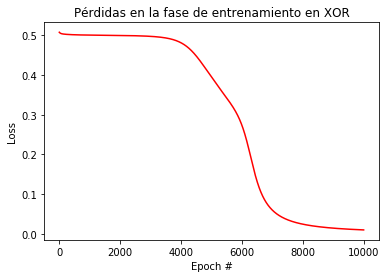

[INFO] data=[0 0], ground-truth=0, pred=0.0615, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9141, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9357, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0718, step=0


In [49]:
import numpy as np
# Construimos el dataset XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Definición de arquitectura haciendo uso de la clase anterior
nn = NeuralNetwork([2, 2, 1], eta=0.1) # (X)

# Entrenamiento de la misma
nn.fit(X, y, epochs=10000)

# Fase de predicción
for x, target in zip (X,y):
  pred = nn.predict(x)[0][0]
  label = 1 if pred > 0.5 else 0
  print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, label))